# Exercise 2

In [45]:
import bitarray
from hashlib import sha3_256, sha256, blake2b
import json
import matplotlib.pyplot as plt
import numpy as np

class Zhiyuan_BloomFilter():
    
    def __init__(self, size=int(1e7)):
        self._size = size
        self._data = bitarray.bitarray(size)
        self._data.setall(0)
        self.hash_tuple = (self.my_hash, self.my_hash2, self.my_hash3)
        
    def debug(self):
        return self._data
    
    def change_hash_tuple(self, *hash_func):
        self.hash_tuple = hash_func
    
    def clear_all(self):
        self._data.setall(0)
        
    def exist_or_not(self, element):
        posi_list = self.find_position(element)
        test_idf = True
        for p in posi_list:
            test_idf = self._data[p] and test_idf
        return test_idf
        
    def add_element(self, element):
        posi_list = self.find_position(element)
        for p in posi_list:
            self._data[p] = 1
    
    def find_position(self, element):
        position_list = []
        for hash_func in self.hash_tuple:
            position_list.append(hash_func(element))
        return position_list
    
    def my_hash(self, s):
        return int(sha256(s.lower().encode()).hexdigest(), 16) % self._size
    
    def my_hash2(self, s):
        return int(blake2b(s.lower().encode()).hexdigest(), 16) % self._size

    def my_hash3(self, s):
        return int(sha3_256(s.lower().encode()).hexdigest(), 16) % self._size

    

class Spell_check():
    
    def __init__(self, size=int(1e7), hash_usage='111', file='words.txt'):
        self.BFt = Zhiyuan_BloomFilter(size)
        if hash_usage =='100':
            self.BFt.change_hash_tuple(self.BFt.my_hash)
        elif hash_usage =='110':
            self.BFt.change_hash_tuple(self.BFt.my_hash, self.BFt.my_hash2)
        with open(file) as f:
            for line in f:
                word = line.strip()
                self.BFt.add_element(word)
    
    def potential_suggestion(self, word):
        output_list = [word]
        word_split = list(word)
        for i in range(len(word_split)):
            word_temp = word_split.copy()
            if (word_split[i].isupper()):
                for j in range(65, 91):
                    word_temp[i] = chr(j)
                    output_list.append("".join(word_temp))
            elif (word_split[i].islower()):
                for j in range(97, 123):
                    word_temp[i] = chr(j)
                    output_list.append("".join(word_temp))
        # Delete the duplicate elements while keeping the order unchanged 
        output_list_nodup = list(set(output_list))
        output_list_nodup.sort(key=output_list.index)
        return output_list_nodup
    
    def give_suggestion(self, word):
        #print(self.BFt.debug())
        output_list = []
        Lreplacement_list = self.potential_suggestion(word)
        for item in Lreplacement_list:
            if self.BFt.exist_or_not(item):
                output_list.append(item)
        return output_list
    
    def test_accuracy(self, file='typos.json'):
        with open(file,'r') as f:
            load_dict = json.load(f)
        count = 0
        correct = 0
        for word_list in load_dict:
            if (word_list[0] != word_list[1]):
                ans = sp.give_suggestion(word_list[0])
                count += 1
                if (len(ans) <= 3 and word_list[1] in ans):
                    correct += 1
        return correct/count

In [3]:
bloomtest = Zhiyuan_BloomFilter()
bloomtest.change_hash_tuple(bloomtest.my_hash, bloomtest.my_hash2)
print(bloomtest.exist_or_not('bloeer')) # False
bloomtest.add_element('bloeer')
print(bloomtest.exist_or_not('bloeer')) # True
print(bloomtest.exist_or_not('bloeerasd')) # False
bloomtest.add_element('apple')
print(bloomtest.exist_or_not('apple')) # True

False
True
False
True


In [256]:
sp = Spell_check(hash_usage='100') # The default size is 1e7
print("When using the first hash function, suggestion of 'floeer' is:", sp.give_suggestion('floeer'))
print("-"*115)
sp = Spell_check(hash_usage='110') 
print("When using the first and second hash function, suggestion of 'floeer' is:", sp.give_suggestion('floeer'))
print("-"*115)
sp = Spell_check(hash_usage='111') 
print("When using all three hash functions, suggestion of 'floeer' is:", sp.give_suggestion('floeer'))

When using the first hash function, suggestion of 'floeer' is: ['bloeer', 'qloeer', 'fyoeer', 'flofer', 'floter', 'flower', 'floeqr', 'floees']
-------------------------------------------------------------------------------------------------------------------
When using the first and second hash function, suggestion of 'floeer' is: ['fyoeer', 'floter', 'flower']
-------------------------------------------------------------------------------------------------------------------
When using all three hash functions, suggestion of 'floeer' is: ['floter', 'flower']


In [32]:
# Collect the number of "good suggestions"
sp = Spell_check(hash_usage='100', size=int(1.71e8))
print(f"Good suggestion rate: {sp.test_accuracy()*100}%")

Good suggestion rate: 90.12%


In [87]:
# Collect the number of "good suggestions"
sp = Spell_check(hash_usage='110', size=int(1.75e7))
print(f"Good suggestion rate: {sp.test_accuracy()*100}%")

Good suggestion rate: 90.064%


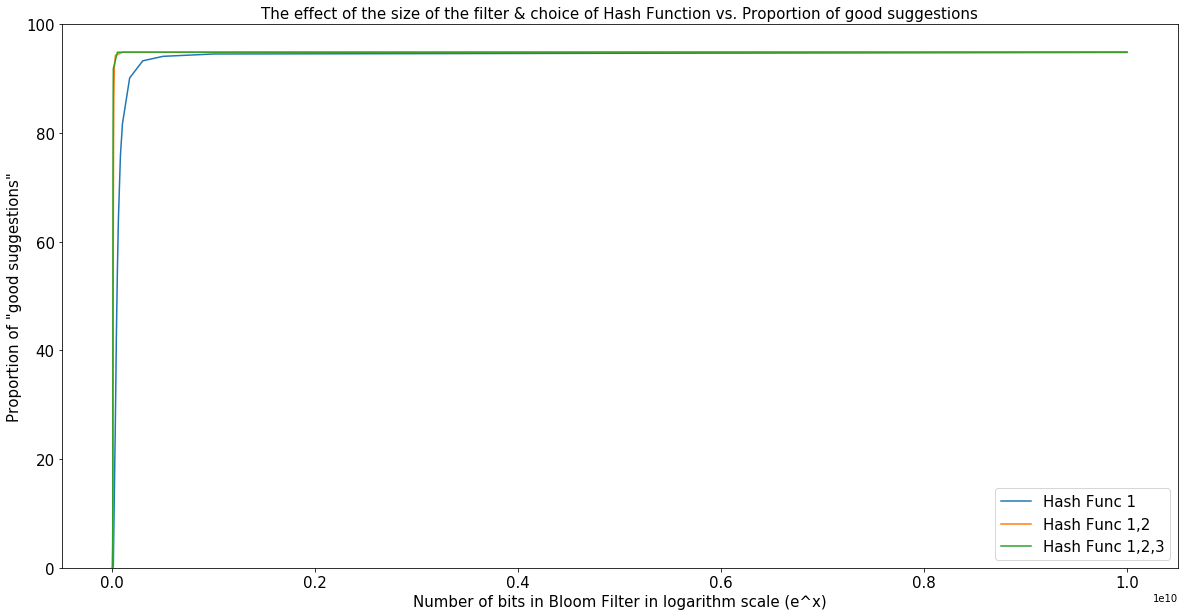

In [84]:
x1 = [1e6, 5e6, 8e6, 9e6, 1e7, 3e7, 4e7, 5e7, 6e7, 8e7, 1e8, 1.71e8, 3e8, 5e8, 1e9, 1e10]
y1 = [0, 0, 0.2, 0.316, 0.516, 26.92, 42.67, 54.82, 64.12, 75.90, 81.72, 90.12, 93.26, 94.09, 94.52, 94.81]
x2 = [1e6, 5e6, 6e6, 7e6, 8e6, 9e6, 1e7, 1.1e7, 1.2e7, 1.3e7, 1.5e7, 2e7, 3e7, 1e8, 1e10]
y2 = [0, 4.676, 13.96, 26.98, 40.36, 52.54, 63.06, 70.70, 76.95, 80.68, 86.57, 92.00, 94.26, 94.83, 94.86]
x3 = [1e6, 4e6, 4.5e6, 4.8e6, 5e6, 5.5e6, 5.8e6, 6e6, 6.8e6, 7.4e6, 8e6, 9e6, 1e7, 5e7, 1e8, 1e10]
y3 = [0, 7.396, 16.97, 25.28, 30.64, 43.53, 51.82, 56.73, 71.87, 79.12, 84.14, 89.12, 91.85, 94.84, 94.86, 94.86]
plt.figure(figsize=(20,10))
#plt.plot(np.log(x1), y1,label='Hash Func 1')
#plt.plot(np.log(x2), y2,label='Hash Func 1,2')
#plt.plot(np.log(x3), y3,label='Hash Func 1,2,3')
plt.plot(x1, y1,label='Hash Func 1')
plt.plot(x2, y2,label='Hash Func 1,2')
plt.plot(x3, y3,label='Hash Func 1,2,3')
plt.ylim([0, 100])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Number of bits in Bloom Filter in logarithm scale (e^x)', fontsize=15)
plt.ylabel('Proportion of "good suggestions"', fontsize=15)
plt.title('The effect of the size of the filter & choice of Hash Function vs. Proportion of good suggestions', fontsize=15)
plt.savefig('README_img/EX2_3.png')
plt.show()